<img src="images/ublogo.png"/>

### CSE610 - Bayesian Non-parametric Machine Learning

  - Lecture Notes
  - Instructor - Varun Chandola
  - Term - Fall 2020

### Objective
The objective of this notebook is to discuss different covariance (or kernel) functions that can be used with GPs.

<div class="alert alert-info">

**Note:** This material is based on Chapter 4 of the GPML book.

</div>

### Preliminaries
- A covariance function is a crucial ingredient of Gaussian process based analysis
$$
k({\bf x},{\bf x}')
$$
- Encodes the assumptions about the function that we want to learn
- Defines the notion of *nearness* or *similarity*

> Question: Can any arbitrary function of input pairs, ${\bf x}$ and ${\bf x}'$ be used as a covariance function?

#### Different types of covariance functions
- **Stationary**: A function of ${\bf x} - {\bf x}'$
> Squared exponential function is a stationary function:
$$
k({\bf x},{\bf x}') = \sigma^2_f \exp(-\frac{1}{\ell}\Vert{\bf x} - {\bf x}'\Vert_2^2)
$$
- **Isotropic**: A function of $\vert{\bf x} - {\bf x}'\vert$
- **Dot product**: A function of ${\bf x}^\top{\bf x}'$

### Relationship with kernels 
A *kernel* is a function with two arguments that maps a pair of inputs, ${\bf x}, {\bf x}' \in \mathcal{X}$ into $\mathbb{R}$. A kernel can be any function. However, for a kernel to be a valid covariance function, it needs to produce a *positive semi-definite* (PSD) *Gram matrix*.
> For a set of input points, $\{{\bf x}_1,{\bf x}_2,\ldots,{\bf x}_N\}$, the Gram matrix is a $N\times N$ matrix, $K$, such that $K_{ij} = k({\bf x}_i,{\bf x}_j)$.

For a matrix to be PSD, ${\bf v}^\top K {\bf v} \ge 0$, for all vectors ${\bf v} \in \mathbb{R}^N$. 
> Some points to remember:
- A symmetric matrix is PSD if and only if all of its eigenvalues are non-negative
- A Gram matrix corresponding to a general kernel function need not be symmetric or PSD
- A Gram matrix corresponding to a valid covariance function should be symmetric and PSD


### Some existing covariance functions
1. The squared exponential (SE) covariance function
$$
k({\bf x},{\bf x}') = \exp(-\frac{1}{\ell}\Vert{\bf x} - {\bf x}'\Vert_2^2)
$$
> Infinitely smooth, and maybe the most widely used covariance function. The strong smoothness property, however, is often unrealistic for representing physical behavior. For that reason, Matern functions are often recommended, as an alternative (see next)
2. The Matern class of covariance functions
$$
k_\nu({\bf x},{\bf x}') = \frac{2^{1-\nu}}{\Gamma(\nu)}\left(\frac{\sqrt{2\nu} \Vert{\bf x}-{\bf x}^\prime\Vert_2}{\ell}\right)^\nu K_{\nu}\left(\frac{\sqrt{2\nu} \Vert{\bf x}-{\bf x}^\prime\Vert_2}{\ell}\right)
$$
Here $K_{\nu}$ is a modified Bessel function. We get a different Matern covariance function for different values of $\nu$. Most useful cases are:
\begin{eqnarray}
k_{\nu=3/2}({\bf x},{\bf x}') & = & \left(1 + \frac{\sqrt{3} \Vert{\bf x}-{\bf x}^\prime\Vert_2}{\ell}\right)\exp\left(-\frac{\sqrt{3}\Vert{\bf x}-{\bf x}'\Vert_2}{\ell}\right)\\
k_{\nu=5/2}({\bf x},{\bf x}') & = & \left(1 + \frac{\sqrt{5} \Vert{\bf x}-{\bf x}^\prime\Vert_2}{\ell}+\frac{5\Vert{\bf x}-{\bf x}'\Vert^2_2}{3\ell^2}\right)\exp\left(-\frac{\sqrt{5}\Vert{\bf x}-{\bf x}'\Vert_2}{\ell}\right)
\end{eqnarray}
> If $\nu \to \infty$, the Matern function becomes the SE function.
3. The *rational quadratic* (RQ) covariance function
$$
k({\bf x},{\bf x}') = \left(1 + \frac{\Vert{\bf x}-{\bf x}'\Vert^2_2}{2\alpha\ell^2}\right)^{-\alpha}
$$
> The RQ function can be thought of as an infinite sum of SE functions.

In [91]:
%run Utilities.ipynb

In [22]:
kernel1 = GPy.kern.RBF(input_dim=1,lengthscale=4)
kernel2 = GPy.kern.Matern32(input_dim=1,lengthscale=4)
kernel3 = GPy.kern.Matern52(input_dim=1,lengthscale=4)

In [16]:
x = np.linspace(-10,10,200)
x0 = np.array([[0]])

In [23]:
K1 = kernel1.K(x[:,np.newaxis],x0)
K2 = kernel2.K(x[:,np.newaxis],x0)
K3 = kernel3.K(x[:,np.newaxis],x0)

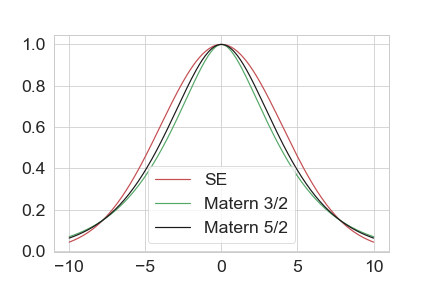

In [26]:
plt.plot(x,K1,'r')
plt.plot(x,K2,'g')
plt.plot(x,K3,'k')
plt.legend(['SE','Matern 3/2','Matern 5/2'])

### Non-stationary covariance functions
One of the simplest non-stationary function is the **dot-product** covariance function:
$$
k({\bf x},{\bf x}') = {\bf x}^\top{\bf x}'
$$
which is equivalent to a linear regression formulation. This linear covariance function can be converted into a polynomial function by using an exponent:
$$
k({\bf x},{\bf x}') = ({\bf x}^\top{\bf x}')^p
$$

Besides the non-stationary dot-product functions, there are other non-stationary functions as well.


<img src='images/functions.png'/>

In [38]:
kernel1 = GPy.kern.Poly(input_dim=1,scale=1)
kernel2 = GPy.kern.Poly(input_dim=1,scale=2)
kernel3 = GPy.kern.Poly(input_dim=1,scale=5)

In [40]:
K1 = kernel1.K(x[:,np.newaxis],x0)
K2 = kernel2.K(x[:,np.newaxis],x0)
K3 = kernel3.K(x[:,np.newaxis],x0)

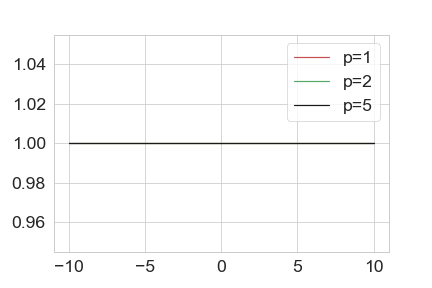

In [41]:
plt.plot(x,K1,'r')
plt.plot(x,K2,'g')
plt.plot(x,K3,'k')
plt.legend(['p=1','p=2','p=5'])

### Making new kernels

### Kernels for non-vectorial inputs
- String kernels
- Fisher kernels


## An exercise with kernels
<img src='images/maunaloa.jpg'/>

In [81]:
import GPy

data = fetch_mldata('mauna-loa-atmospheric-co2').data
X = data[:, 1]
y = data[:, 0]

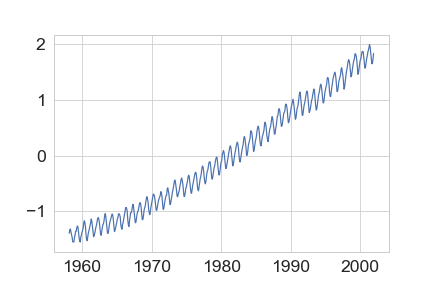

In [98]:
plt.plot(X,y)

In [126]:
#k1 = GPy.kern.RBF(1)
k1 = GPy.kern.RBF(1,variance=66.0, lengthscale=67.0)
k2 = GPy.kern.StdPeriodic(1, lengthscale=1.3, period=1.0) * GPy.kern.RBF(1, lengthscale=90.0, variance=2.4) 
k3 = GPy.kern.RatQuad(1,lengthscale=1.2,power=0.78, variance=0.66)
k4 = GPy.kern.RBF(1,lengthscale= 0.134, variance=0.18) + GPy.kern.White(1,variance=0.19**2)

k =  GPy.kern.Add([k1.copy(),k2.copy(),k3.copy(),k4.copy()])



In [114]:
kper = GPy.kern.StdPeriodic(1, lengthscale=4, period=4.0)

In [123]:
k1 = GPy.kern.RBF(1,variance=66.0, lengthscale=67.0)
k2 = GPy.kern.StdPeriodic(1, lengthscale=1.3, period=1.0) * GPy.kern.RBF(1, lengthscale=90.0, variance=2.4) 
k3 = GPy.kern.RatQuad(1,lengthscale=1.2,power=0.78, variance=0.66)
#k4 = GPy.kern.RBF(1,lengthscale= 0.134, variance=0.18) + GPy.kern.White(1,variance=0.19**2)

#k =  GPy.kern.Add([k1.copy(),k2.copy(),k3.copy(),k4.copy()])
k =  GPy.kern.Add([k1.copy(),k2.copy(),k3.copy()])



In [127]:
# try different kernel functions
K = k.K(X)
m = np.zeros(X.shape) # assuming a zero mean-function
f= np.random.multivariate_normal(m.ravel(),K, 1)

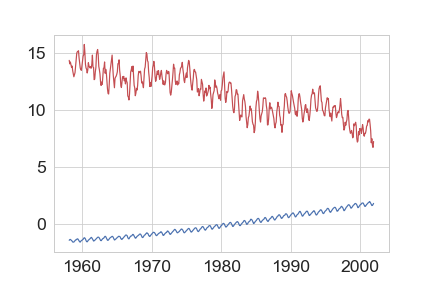

In [128]:
c

In [96]:
y.shape

(521,)

In [148]:
md = GPy.models.GPRegression(X,y[:,np.newaxis],kernel=k,noise_var=1e-3)


In [145]:
Xtest = np.linspace(1990,2050,100)
preds = md.predict(Xtest[:,np.newaxis])

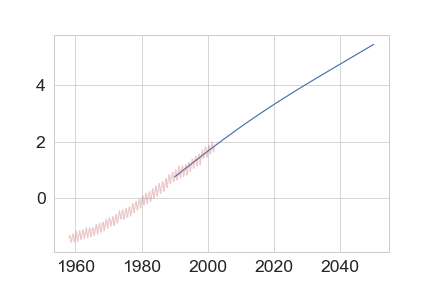

In [146]:
plt.plot(Xtest,preds[0])
plt.plot(X,y,'r',alpha=0.3)

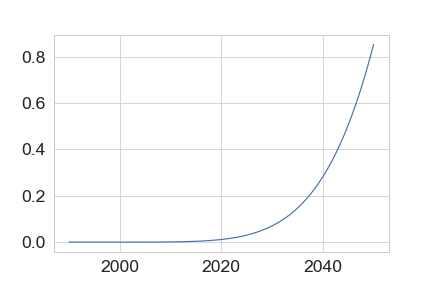

In [147]:
plt.plot(Xtest,preds[1])

### Kernel with parameters given in GPML book
- k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
- k2 = 2.4**2 * RBF(length_scale=90.0) * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component

### medium term irregularity
k3 = 0.66**2 \
    * RationalQuadratic(length_scale=1.2, alpha=0.78)
k4 = 0.18**2 * RBF(length_scale=0.134) \
    + WhiteKernel(noise_level=0.19**2)  # noise terms
kernel_gpml = k1 + k2 + k3 + k4